<a href="https://colab.research.google.com/github/antondremak91/sales-predictions/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [335]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
filename = '/content/drive/MyDrive/codingDojo/data_science/project_1/sales_predictions.csv'

In [336]:
sales_data = pd.read_csv(filename)
sales_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [337]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Lets see how many rows and columns of data do we have.

In [338]:
sales_data.shape

(8523, 12)

Looks like we have 8523 rows and 12 clumns in this dataset.

Now, lets check for duplicate data.

In [339]:
sales_data.duplicated().any()

False

Looks like we dont have any duplicated data in our dataset.

Lets check for missing valuse.

In [340]:
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

So, we have 1463 values thats missing in our 'Item Weight' column and 2410 in our 'Outlet Size' column.



We can drop Item Weight column because its an individual characteristic of each item and shouldnt negatively influence our prediction.

In [341]:
sales_data.drop(columns=['Item_Weight'], inplace=True)

In [342]:
sales_data.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

For 'Outlet Size' we can do a little research and try to fill those missing values. We will group them to try to find a pattern.

In [343]:
sales_data.groupby(['Outlet_Size', 'Outlet_Type','Outlet_Location_Type']).sum()

Item_Visibility  ...  Item_Outlet_Sales
Outlet_Size Outlet_Type       Outlet_Location_Type                   ...                   
High        Supermarket Type1 Tier 3                      55.879859  ...       2.142664e+06
Medium      Supermarket Type1 Tier 1                      56.549156  ...       2.183970e+06
            Supermarket Type2 Tier 3                      56.621454  ...       1.851823e+06
            Supermarket Type3 Tier 3                      54.804764  ...       3.453926e+06
Small       Grocery Store     Tier 1                      57.257041  ...       1.796941e+05
            Supermarket Type1 Tier 1                      56.231875  ...       2.118395e+06
                              Tier 2                      56.974873  ...       2.268123e+06

[7 rows x 4 columns]

In [344]:
st1 = sales_data['Outlet_Type'] == 'Supermarket Type1'
st2 = sales_data['Outlet_Type'] == 'Supermarket Type2'
st3 = sales_data['Outlet_Type'] == 'Supermarket Type3'
gs = sales_data['Outlet_Type'] == 'Grocery Store'
t1 = sales_data['Outlet_Location_Type'] == 'Tier 1'
t2 = sales_data['Outlet_Location_Type'] == 'Tier 2'
t3 = sales_data['Outlet_Location_Type'] == 'Tier 3'

In [345]:
sales_data.loc[st1 & t3 & (sales_data['Outlet_Size'].isna()), 'Outlet_Size'] = 'High'
sales_data.loc[st1 & t1 & (sales_data['Outlet_Size'].isna()), 'Outlet_Size'] = 'Medium'
sales_data.loc[st2 & t3 & (sales_data['Outlet_Size'].isna()), 'Outlet_Size'] = 'Medium'
sales_data.loc[st3 & t3 & (sales_data['Outlet_Size'].isna()), 'Outlet_Size'] = 'Medium'
sales_data.loc[gs & t1 & (sales_data['Outlet_Size'].isna()), 'Outlet_Size'] = 'Small'
sales_data.loc[st1 & t1 & (sales_data['Outlet_Size'].isna()), 'Outlet_Size'] = 'Small'
sales_data.loc[st1 & t2 & (sales_data['Outlet_Size'].isna()), 'Outlet_Size'] = 'Small'

In [346]:
sales_data.fillna('Medium', inplace=True)

In [347]:
sales_data.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

No more missing values left in our dataset.

Lets check our dataset for inconsistent data.

In [348]:
sales_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [349]:
sales_data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

We need to replace the data in our 'Item fat count' column.

In [350]:
sales_data['Item_Fat_Content'] = sales_data['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')
sales_data['Item_Fat_Content'] = sales_data['Item_Fat_Content'].replace(['reg'], 'Regular')

In [351]:
sales_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Now we have a consistent data in our 'Item fat content column'

For any numerical columns, obtain the summary statistics of each (min, max, mean)



In [352]:
sales_data.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


Lets create a histagram to view some features in our dataset. We can start with Outlet Size.

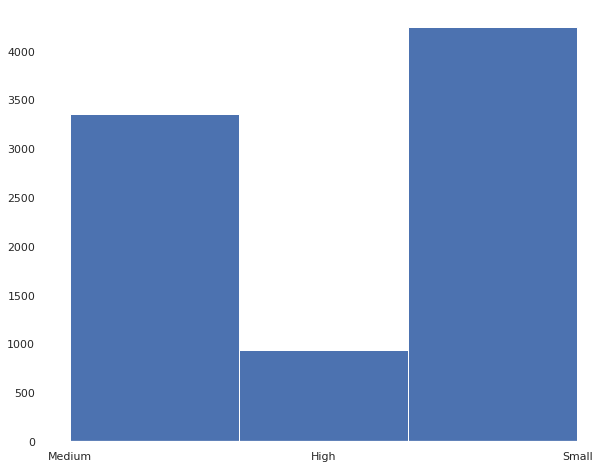

In [353]:
sales_data['Outlet_Size'].hist(bins = 3);

Looks like the majority of our outlets are small size vendors.

Lets compare outlet types.

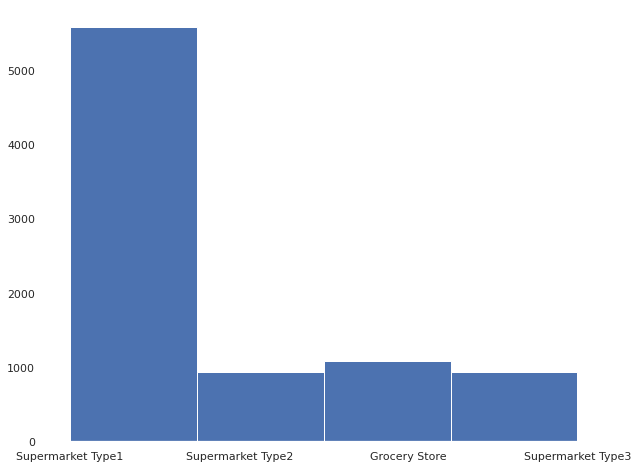

In [354]:
sales_data['Outlet_Type'].hist(bins = 4);

From this histagram we can see that majority of our outlets are 'Supermarket Type 1'.

We can also check how items with different fat content sell.

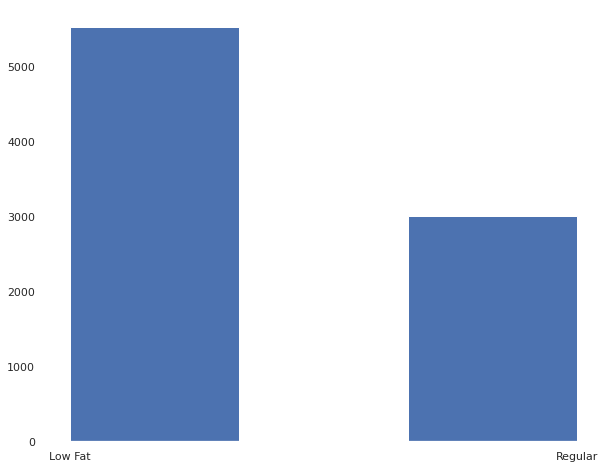

In [355]:
sales_data['Item_Fat_Content'].hist(bins = 3);

Here we can clearly see that low fat items do sell better.

Lets compare some statistycal data using boxplots.

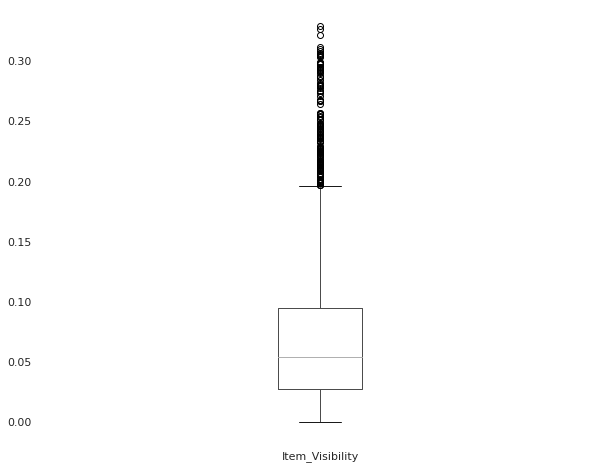

In [356]:
sales_data.boxplot(column='Item_Visibility');

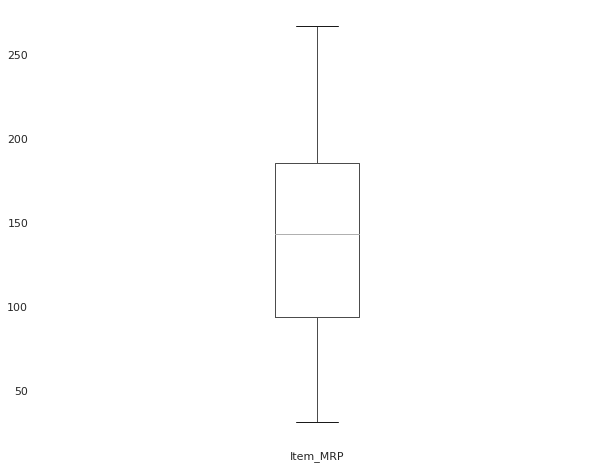

In [357]:
sales_data.boxplot(column='Item_MRP');

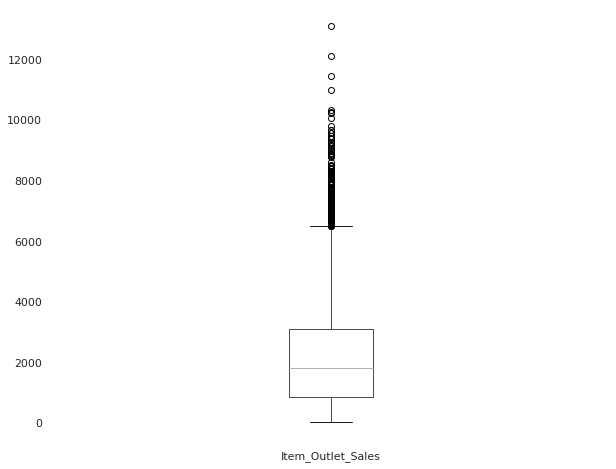

In [358]:
sales_data.boxplot(column='Item_Outlet_Sales');

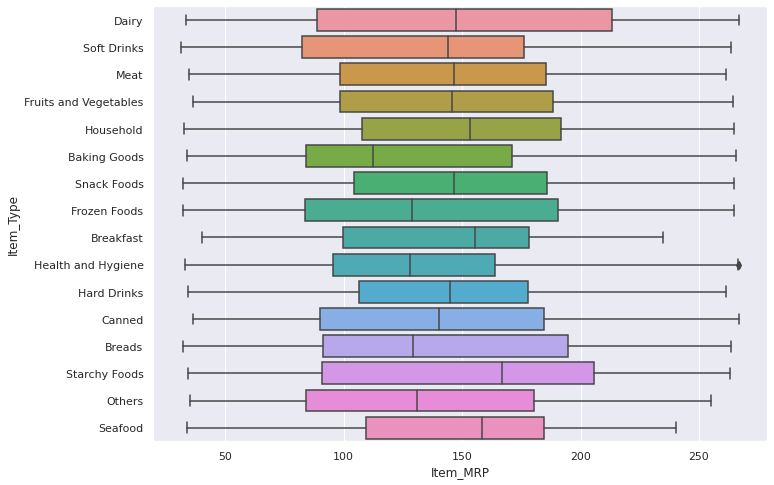

In [359]:
sns.set(rc={'figure.figsize':(11,8)})
sns.boxplot(x = sales_data['Item_MRP'], y = sales_data['Item_Type']);
plt.show()

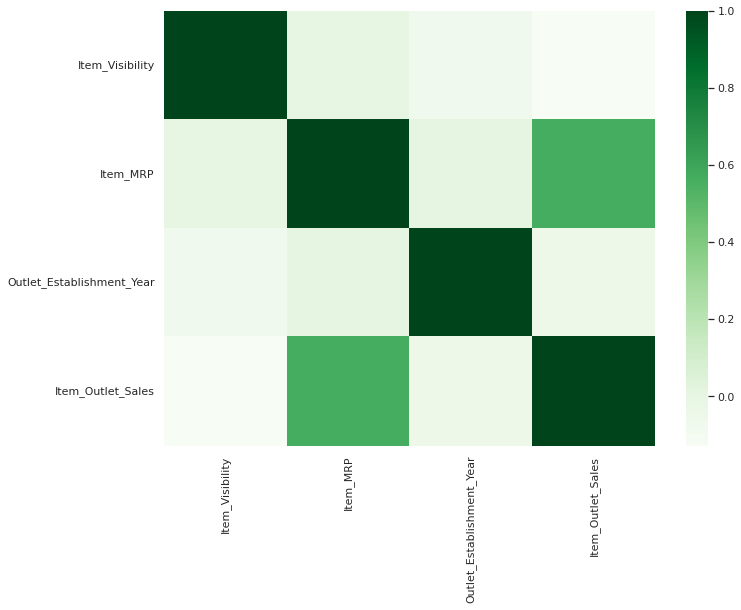

In [360]:
corr = sales_data.corr()
sns.heatmap(corr, cmap = 'Greens');

Here we can see a clear correlation between Item MRP and Item outlet sales.

Lets see what is the best selling items in each outlet size.

In [361]:
sm = sales_data['Outlet_Size'] == 'Small'
md = sales_data['Outlet_Size'] == 'Medium'
hi = sales_data['Outlet_Size'] == 'High'

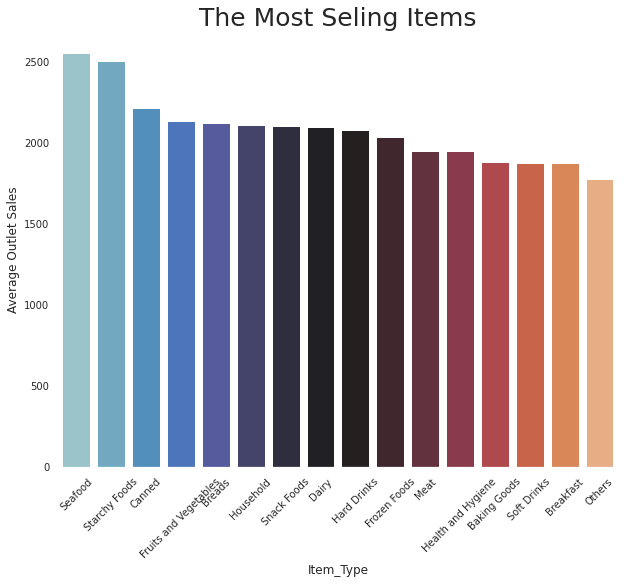

In [362]:
types = sales_data[sm].groupby('Item_Type')['Item_Outlet_Sales'].mean().reset_index(name = 'Average Outlet Sales').sort_values('Average Outlet Sales', ascending = False)

sns.set(rc={'figure.figsize':(10,8), 'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.barplot(y='Average Outlet Sales', x='Item_Type', data=types, palette='icefire');

plt.title('The Most Seling Items', fontsize = 25)

plt.xticks(fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10)

ax=plt.gca()

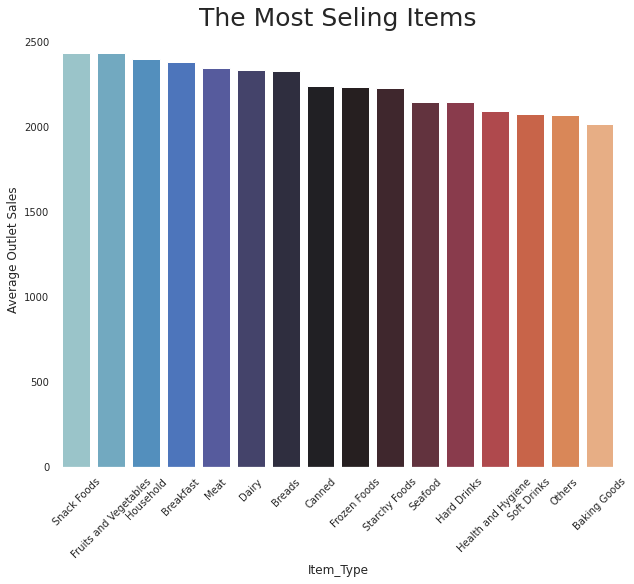

In [363]:
types = sales_data[md].groupby('Item_Type')['Item_Outlet_Sales'].mean().reset_index(name = 'Average Outlet Sales').sort_values('Average Outlet Sales', ascending = False)

sns.set(rc={'figure.figsize':(10,8), 'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.barplot(y='Average Outlet Sales', x='Item_Type', data=types, palette='icefire');

plt.title('The Most Seling Items', fontsize = 25)

plt.xticks(fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10)

ax=plt.gca()

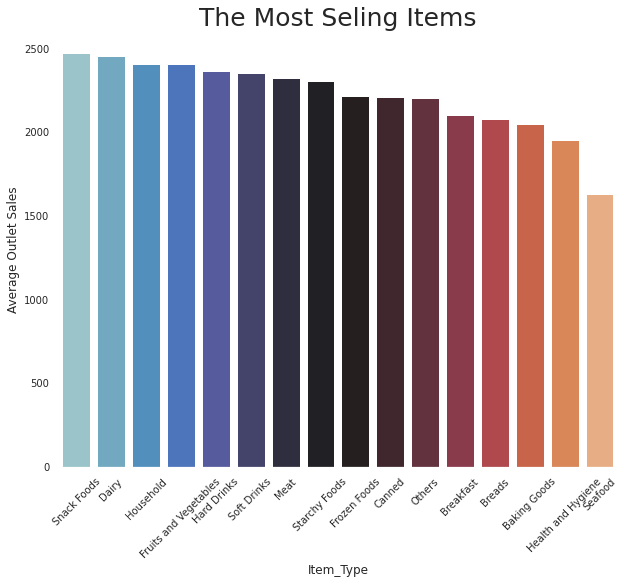

In [364]:
types = sales_data[hi].groupby('Item_Type')['Item_Outlet_Sales'].mean().reset_index(name = 'Average Outlet Sales').sort_values('Average Outlet Sales', ascending = False)

sns.set(rc={'figure.figsize':(10,8), 'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.barplot(y='Average Outlet Sales', x='Item_Type', data=types, palette='icefire');

plt.title('The Most Seling Items', fontsize = 25)

plt.xticks(fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10)

ax=plt.gca()